# Mandelbrot Sets


$ x_{n+1} = x_{n}^{2} + C $

The above equation helps us to plot a Mandelbrot set. Note that it does not define $(x,y)$ pairs. Instead, it defines a series. If we set $ x=0 $ and $C=1$ we get the series: $1,2,5,26,(26^2 + 1)$, etc. Choosing different values of C will give vastly different series. Some of these series will repeat, some will converge, and the rest will diverge. This is true whether C is a real number or a complex number.

If we assume C is a complex number, $a+bi$, we can plot $(a,b)$ for multiple values of C. We can plug C into the equation above and generate our series. Depending on the rate of change in the series values, we can assign a color. Usually, convegent series are assigned black and exremely divergent series are assigend very light colors. The series in the example above diverges fairly quickly so you would plot a fairly light color at the point $(1,0)$. You can control the appearance of your plots by assigning different functions to compute color: $f(dx) = color$. The color is determined by the rate of change in your series for any given value of C.

The Mandelbrot set is generally the set of all complex C values for which the series does not diverge to infinity (pictured in black below).  

Assume C = (a + bi) and the first two terms of our series become: (a + bi), ($a^2$ + 2abi - $b^2$) + (a + bi), ... We iterate through all the (a,b) coords of our image and plot a color based on how the calculated series for that point converges or diverges. 


![Image](mandelplot.png)

In [1]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import colorsys
import math
import os
%matplotlib inline

In [2]:
# Define some constants
# Number of pixels in our image
imageLength = 720
imageHeight = 540
xDomain = 3.4
xCenter = -0.65
yCenter = 0.0
# Used to determine if series diverges
iterations = 500
testDistance = 4

In [3]:
# Calculate the rest of our constants
aspectRatio = imageLength / imageHeight
yRange = xDomain / aspectRatio
xMin = xCenter - xDomain/2
yMax = yCenter + yRange/2 
xScale = xDomain/imageLength
yScale = yRange/imageHeight

In [4]:
# Initialize our image to black
img = Image.new('RGB',(imageLength,imageHeight), color='black')
pixels = img.load()

In [5]:
# Loop through every pixel in the image
for row in range(imageHeight):
    for col in range(imageLength):
        # Convert to (x,y) coords. (row, col) starts at top left
        # We want min (x,y) to be at bottom left
        xComplex = xMin + col * xScale
        yComplex = yMax - row * yScale
        # We are going to generate our series using this value as our constant.
        # It is a complex number (a+bi) defined as (xComplex, yComplex)
        # We will generate up to iterations terms of the series for
        # each complex number. Note that (a+bi)**2 = a**2 + 2abi - b**2
        x = xComplex # We need a starting value
        y = yComplex # We need a starting value to generate next val in series
        for i in range(iterations + 1):
            a = x*x - y*y # First generate (a+bi)**2 using previous (x,y)
            b = 2 * x * y
            x = a + xComplex  # New series values are old value squared plus
            y = b + yComplex  # our constant complex number.
            # Check if series is diverging
            if (x * x) + (y * y) > testDistance:
                break
                
        # If we exited the loop early, our series diverged
        if i < iterations:
            # Get fraction of loop we completed. Higher values
            # mean slower divergence
            fraction = i/iterations
            hue = fraction   # Between 0 and 1. Progresses Red, Yellow, Green, Cyan, Blue, Magenta
            saturation = 0.7   # Amount of grey - zero is all grey, one is no grey
            value = 1        # Brightness, zero is black, 1 is full brightness
            rgb = tuple(round(i*255) for i in colorsys.hsv_to_rgb(hue,saturation,value))
            # Set the pixel to the color we calculated
            pixels[col,row] = rgb              

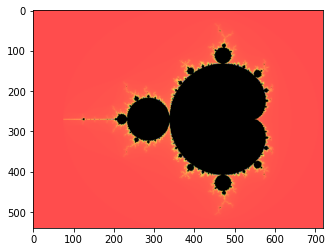

In [6]:
# Shows image in a separate window
#img.show()  
# Shows image inline
imshow(np.asarray(img))  
#img.save('output.png')
#os.system('open output.png')  